<a href="https://colab.research.google.com/github/surbhi-sharma99/python/blob/master/Copy_of_Copy_of_GDG_TF_3_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

Instructions for updating:
non-resource variables are not supported in the long term
2.2.0


In [15]:

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()


In [11]:
example1 = tf.one_hot([0,2,0,0,2,1,1,2,0,2],3)

In [12]:
example1.eval()

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [16]:
train_labels, test_labesl = tf.one_hot(train_labels, 10), tf.one_hot(test_labels, 10)

In [17]:
train_labels.shape

TensorShape([Dimension(60000), Dimension(10)])

In [19]:
train_labels[456].eval()

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [24]:
image_size = 28
labels_size = 10                     #as we know only 10 digits in decimal numbering system

## Ignore below lines for now
learning_rate = 0.05
steps_number = 1000
batch_size = 100
hidden_1_size = 50
hidden_2_size = 100
hidden_3_size = 50

Label on Image :  Tensor("strided_slice_2:0", shape=(10,), dtype=float32)


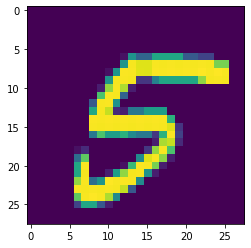

In [22]:
import matplotlib.pyplot as plt

image_index = 34527
print("Label on Image : ", train_labels[image_index])

plt.imshow(train_images[image_index].reshape(28,28) )

In [23]:
#Creating placeholder for our training image vaariables, and labels
#To Feed the network with our training data,, which would eventually give out and output telling our digit
#Out training would be seeing the image comparing it to the label, again and again after correction
#hence we would need these to placeholders

training_data = tf.placeholder(tf.float32, [None, image_size*image_size])
labels = tf.placeholder(tf.float32, [None, labels_size])

In [25]:
## Creating a new Hidden Layer

# Variables of hidden layer, W and b for hidden layer nodes
W_h = tf.Variable(tf.truncated_normal([image_size*image_size, hidden_1_size], stddev=0.1))
b_h = tf.Variable(tf.constant(0.1, shape = [hidden_1_size] ) )

# Creating a relu activation function 
hidden_1 = tf.nn.relu(tf.matmul(training_data, W_h) + b_h)


W_h1 = tf.Variable(tf.truncated_normal([hidden_1_size,hidden_2_size], stddev=0.1))
b_h1 = tf.Variable(tf.constant(0.1, shape=[hidden_2_size] ) )

# Creating a relu activation function 
hidden2 = tf.nn.relu(tf.matmul(hidden_1, W_h1) + b_h1)

In [27]:
# Now the last output layer's W b   , would be changed to take input from
#our Previously made hidden layer

# Another W  and b for output layer
W = tf.Variable(tf.truncated_normal([hidden_size, labels_size], stddev=0.1))
b = tf.Variable(tf.constant(0.1, shape=[labels_size]))

# Connect hidden to the output layer
output = tf.matmul(hidden_1, W) + b

In [ ]:
# Creating a loss function, or as understood, how far we are from the actuall value
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=labels, logits=output))

# Gradient Descent Optimizer, to which we would give a leearning rate as discussed,
# and we would provide a function to him, so that he has an aim to minimize it.
train_step = tf.train.AdamOptimizer(learning_rate).minimize(loss)

In [ ]:
correct_prediction = tf.equal(tf.argmax(output, 1), tf.argmax(labels, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [7]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [ ]:
for i in range(steps_number):
  # Get the next batch
  input_batch, labels_batch = mnist.train.next_batch(batch_size)
  feed_dict = {training_data: input_batch, labels: labels_batch}

  # Run the training step
  train_step.run(feed_dict=feed_dict)
  
  if i%9 == 0:
    train_accuracy = accuracy.eval(feed_dict=feed_dict)
    print("Step %d, training batch accuracy %g %%"%(i, train_accuracy*100))
    test_accuracy = accuracy.eval(feed_dict={training_data: mnist.test.images, labels: mnist.test.labels})
    print("Test accuracy: %g %%"%(test_accuracy*100))
    print("-"*30)

Step 0, training batch accuracy 96 %
Test accuracy: 92.24 %
------------------------------
Step 9, training batch accuracy 97 %
Test accuracy: 91.85 %
------------------------------
Step 18, training batch accuracy 92 %
Test accuracy: 93.15 %
------------------------------
Step 27, training batch accuracy 99 %
Test accuracy: 92.75 %
------------------------------
Step 36, training batch accuracy 96 %
Test accuracy: 92.47 %
------------------------------
Step 45, training batch accuracy 92 %
Test accuracy: 93.16 %
------------------------------
Step 54, training batch accuracy 97 %
Test accuracy: 93.4 %
------------------------------
Step 63, training batch accuracy 94 %
Test accuracy: 92.32 %
------------------------------
Step 72, training batch accuracy 93 %
Test accuracy: 93.42 %
------------------------------
Step 81, training batch accuracy 94 %
Test accuracy: 93.37 %
------------------------------
Step 90, training batch accuracy 93 %
Test accuracy: 92.39 %
----------------------

In [ ]:
 test_accuracy = accuracy.eval(feed_dict={training_data: mnist.test.images, labels: mnist.test.labels})
print("Test accuracy: %g %%"%(test_accuracy*100))

Test accuracy: 92.8 %
